#Importing the libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


data_url = 'https://gist.github.com/manutej/8e00f4110e7d4e40dbdc2b5985b1d59a/raw/9f6329ff83b4ea8eef74839b1f75f7d2acab6550/goodreads.csv'
df = pd.read_csv(data_url, on_bad_lines='skip')
print(df)

       bookID                                              title  \
0           1  Harry Potter and the Half-Blood Prince (Harry ...   
1           2  Harry Potter and the Order of the Phoenix (Har...   
2           4  Harry Potter and the Chamber of Secrets (Harry...   
3           5  Harry Potter and the Prisoner of Azkaban (Harr...   
4           8  Harry Potter Boxed Set  Books 1-5 (Harry Potte...   
...       ...                                                ...   
11118   45631   Expelled from Eden: A William T. Vollmann Reader   
11119   45633                        You Bright and Risen Angels   
11120   45634                    The Ice-Shirt (Seven Dreams #1)   
11121   45639                                        Poor People   
11122   45641                        Las aventuras de Tom Sawyer   

                                                 authors  average_rating  \
0                             J.K. Rowling/Mary GrandPré            4.57   
1                             J

#Data Preparation: cleaning and transforming

####Handling missing data

In [44]:
print(df.isnull().sum())

bookID                0
title                 0
authors               0
average_rating        0
isbn                  0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64


In [45]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7     num_pages         11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
dtypes: float64(1), int64(5), object(6)
memory usage: 1.0+ MB
None


In [30]:
print(df['title'])

0        Harry Potter and the Half-Blood Prince (Harry ...
1        Harry Potter and the Order of the Phoenix (Har...
2        Harry Potter and the Chamber of Secrets (Harry...
3        Harry Potter and the Prisoner of Azkaban (Harr...
4        Harry Potter Boxed Set  Books 1-5 (Harry Potte...
                               ...                        
11118     Expelled from Eden: A William T. Vollmann Reader
11119                          You Bright and Risen Angels
11120                      The Ice-Shirt (Seven Dreams #1)
11121                                          Poor People
11122                          Las aventuras de Tom Sawyer
Name: title, Length: 11123, dtype: object


In [46]:
df['authors']

0                               J.K. Rowling/Mary GrandPré
1                               J.K. Rowling/Mary GrandPré
2                                             J.K. Rowling
3                               J.K. Rowling/Mary GrandPré
4                               J.K. Rowling/Mary GrandPré
                               ...                        
11118    William T. Vollmann/Larry McCaffery/Michael He...
11119                                  William T. Vollmann
11120                                  William T. Vollmann
11121                                  William T. Vollmann
11122                                           Mark Twain
Name: authors, Length: 11123, dtype: object

####Encoding Categorical Variables

In [47]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['authors_encoded'] = label_encoder.fit_transform(df['authors'])
print(df['authors_encoded'])

0        2626
1        2626
2        2622
3        2626
4        2626
         ... 
11118    6556
11119    6555
11120    6555
11121    6555
11122    4116
Name: authors_encoded, Length: 11123, dtype: int64


In [48]:
print(df['authors_encoded'].value_counts())

authors_encoded
5786    40
4747    40
5470    39
4711    35
46      33
        ..
3738     1
27       1
4438     1
6054     1
6556     1
Name: count, Length: 6639, dtype: int64


#Visualize and Explore the Data

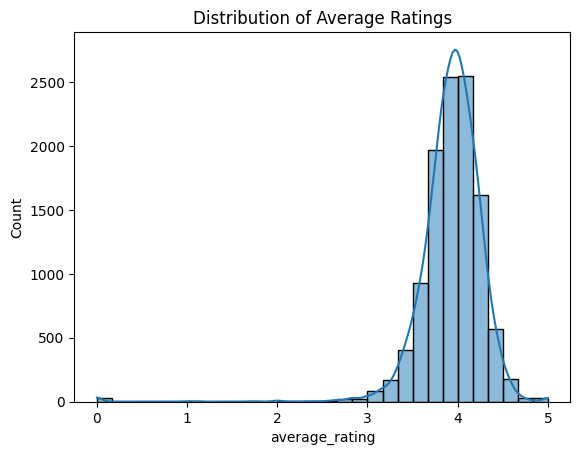

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
summary_stats = pd.DataFrame({
    'Data Types': df.dtypes,
    'Missing values': df.isnull().sum(),
    'Unique values': df.nunique()
})

#Data visualization
sns.histplot(df['average_rating'], bins=30, kde=True)
plt.title('Distribution of Average Ratings')
plt.show()


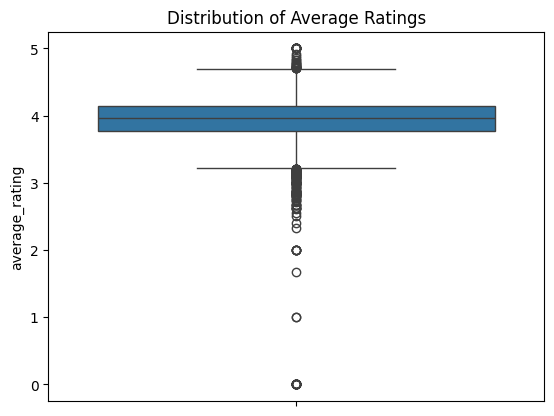

In [50]:
sns.boxplot(df['average_rating'])
plt.title('Distribution of Average Ratings')
plt.show()


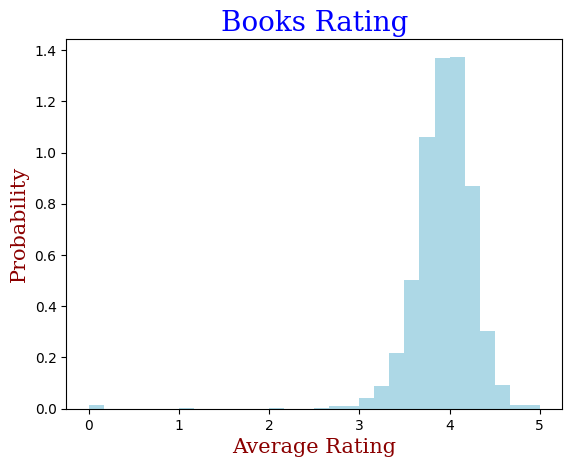

In [51]:
plt.hist(df['average_rating'], bins=30, density=True, color='lightblue')
font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','color':'darkred','size':15}

plt.title("Books Rating", fontdict = font1)
plt.xlabel("Average Rating", fontdict = font2)
plt.ylabel("Probability", fontdict = font2)
plt.show()

#Modeling and making predictions

###Setting up Data for Modeling

In [52]:
print(df.columns)

Index(['bookID', 'title', 'authors', 'average_rating', 'isbn', 'isbn13',
       'language_code', '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher', 'authors_encoded'],
      dtype='object')


In [54]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

df.rename(columns={'  num_pages':'num_pages'}, inplace=True)
X = df[['num_pages']]
y = df['average_rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(df.info())
print(' ')
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ',y_test.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11123 entries, 0 to 11122
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11123 non-null  int64  
 1   title               11123 non-null  object 
 2   authors             11123 non-null  object 
 3   average_rating      11123 non-null  float64
 4   isbn                11123 non-null  object 
 5   isbn13              11123 non-null  int64  
 6   language_code       11123 non-null  object 
 7   num_pages           11123 non-null  int64  
 8   ratings_count       11123 non-null  int64  
 9   text_reviews_count  11123 non-null  int64  
 10  publication_date    11123 non-null  object 
 11  publisher           11123 non-null  object 
 12  authors_encoded     11123 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 1.1+ MB
None
 
X_train:  (8898, 1)
X_test:  (2225, 1)
y_train:  (8898,)
y_test:  (2225,)


In [55]:
print(X_train.head())
print(' ')
print(y_train.head())

       num_pages
3279          80
4001         182
10602        352
6604         364
7691         371
 
3279     3.92
4001     3.91
10602    4.19
6604     4.06
7691     4.01
Name: average_rating, dtype: float64


###Creating and Training the Model

In [56]:
#Creating the Model
model = LinearRegression()

#Transforming the Model
model.fit(X_train, y_train)

LinearRegression()

###Making Predictions and Evaluation the Model

In [58]:
#Making Predictions
y_pred = model.predict(X_test)

#Evaluating the Model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.12314531420128803
